In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate

In [40]:
df = pd.read_csv('Most Streamed Spotify Songs 2024.csv/Most Streamed Spotify Songs 2024.csv', encoding='latin1') 

DATA CLEANING

In [43]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [45]:
#features of dataset
print(df.dtypes)

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

In [47]:
#checking the numbers of values we have in each column
df.count()

Track                         4600
Album Name                    4600
Artist                        4595
Release Date                  4600
ISRC                          4600
All Time Rank                 4600
Track Score                   4600
Spotify Streams               4487
Spotify Playlist Count        4530
Spotify Playlist Reach        4528
Spotify Popularity            3796
YouTube Views                 4292
YouTube Likes                 4285
TikTok Posts                  3427
TikTok Likes                  3620
TikTok Views                  3619
YouTube Playlist Reach        3591
Apple Music Playlist Count    4039
AirPlay Spins                 4102
SiriusXM Spins                2477
Deezer Playlist Count         3679
Deezer Playlist Reach         3672
Amazon Playlist Count         3545
Pandora Streams               3494
Pandora Track Stations        3332
Soundcloud Streams            1267
Shazam Counts                 4023
TIDAL Popularity                 0
Explicit Track      

In [49]:
#checking for null values
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [51]:
df.duplicated().sum()

np.int64(2)

In [53]:
df.drop_duplicates(inplace=True)

In [55]:
df.duplicated().sum()

np.int64(0)

In [57]:
#filling our missing values with the median 
median_fill_cols = [
    "Spotify Streams", "Spotify Playlist Count", "Spotify Playlist Reach",
    "YouTube Views", "YouTube Likes", "TikTok Posts", "TikTok Likes",
    "TikTok Views", "YouTube Playlist Reach", "Apple Music Playlist Count",
    "AirPlay Spins", "Pandora Streams", "Pandora Track Stations",
    "Shazam Counts"
]

# Convert all numeric columns with comma formatting to numeric
for col in median_fill_cols:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)


for col in median_fill_cols:
    df[col + "_missing"] = df[col].isna().astype(int)
    df[col] = df[col].fillna(df[col].median())

In [59]:
#Not every song is distributed on Deezer / Amazon.filling the missing values with 0 is better
zero_fill_cols = [
    "Deezer Playlist Count", 
    "Deezer Playlist Reach", 
    "Amazon Playlist Count"
]

for col in zero_fill_cols:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)


for col in zero_fill_cols:
    df[col + "_missing"] = df[col].isna().astype(int)
    df[col] = df[col].fillna(0)

In [61]:
df['Artist'] = df['Artist'].fillna("Unknown Artist")

In [63]:
df = df.drop(columns=["TIDAL Popularity", "Soundcloud Streams", "SiriusXM Spins"])

In [65]:
df = df.drop(columns=["Spotify Popularity"])

In [ ]:
# Clean column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [67]:
df.count()

Track                                 4598
Album Name                            4598
Artist                                4598
Release Date                          4598
ISRC                                  4598
All Time Rank                         4598
Track Score                           4598
Spotify Streams                       4598
Spotify Playlist Count                4598
Spotify Playlist Reach                4598
YouTube Views                         4598
YouTube Likes                         4598
TikTok Posts                          4598
TikTok Likes                          4598
TikTok Views                          4598
YouTube Playlist Reach                4598
Apple Music Playlist Count            4598
AirPlay Spins                         4598
Deezer Playlist Count                 4598
Deezer Playlist Reach                 4598
Amazon Playlist Count                 4598
Pandora Streams                       4598
Pandora Track Stations                4598
Shazam Coun

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Track                               4598 non-null   object 
 1   Album Name                          4598 non-null   object 
 2   Artist                              4598 non-null   object 
 3   Release Date                        4598 non-null   object 
 4   ISRC                                4598 non-null   object 
 5   All Time Rank                       4598 non-null   object 
 6   Track Score                         4598 non-null   float64
 7   Spotify Streams                     4598 non-null   float64
 8   Spotify Playlist Count              4598 non-null   float64
 9   Spotify Playlist Reach              4598 non-null   float64
 10  YouTube Views                       4598 non-null   float64
 11  YouTube Likes                       4598 non-nul

Converting these objects or strings types into numeric formats 

In [72]:
df.select_dtypes(include='object').columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank'],
      dtype='object')

In [74]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n🔹 {col} ({df[col].nunique()} unique values):\n{df[col].unique()}")


🔹 Track (4370 unique values):
['MILLION DOLLAR BABY' 'Not Like Us' 'i like the way you kiss me' ...
 'Grace (feat. 42 Dugg)' 'Nashe Si Chadh Gayi'
 'Me Acostumbre (feat. Bad Bunny)']

🔹 Album Name (4005 unique values):
['Million Dollar Baby - Single' 'Not Like Us' 'I like the way you kiss me'
 ... 'Dil Meri Na Sune (From "Genius")' 'November Top 10 Songs'
 'Me Acostumbre (feat. Bad Bunny)']

🔹 Artist (2000 unique values):
['Tommy Richman' 'Kendrick Lamar' 'Artemas' ... 'Kerim Araz'
 'Jaques Raupï¿' 'BUSHIDO ZHO']

🔹 Release Date (1562 unique values):
['4/26/2024' '5/4/2024' '3/19/2024' ... '10/31/2018' '11/8/2016'
 '4/11/2017']

🔹 ISRC (4598 unique values):
['QM24S2402528' 'USUG12400910' 'QZJ842400387' ... 'USUG12000043'
 'INY091600067' 'USB271700107']

🔹 All Time Rank (4577 unique values):
['1' '2' '3' ... '4,571' '4,591' '4,593']


In [76]:
#Drop theses cause it has too many unique values and is hard to use in a model.
df.drop(["Track", "Album Name", "ISRC"], axis=1, inplace=True)

In [82]:
#Encode Aritst
le = LabelEncoder()
df["Artist_encoded"] = le.fit_transform(df["Artist"])
df = df.drop(columns=["Artist"])

#Convert Release Date to numeric features
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")
df["Release_Year"] = df["Release Date"].dt.year
df["Release_Month"] = df["Release Date"].dt.month
df["Release_Day"] = df["Release Date"].dt.day
df = df.drop(columns=["Release Date"])

#Convert All Time Rank to numeric
df["All Time Rank"] = df["All Time Rank"].astype(str).str.replace(",", "").astype(float)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   All Time Rank                       4598 non-null   float64
 1   Track Score                         4598 non-null   float64
 2   Spotify Streams                     4598 non-null   float64
 3   Spotify Playlist Count              4598 non-null   float64
 4   Spotify Playlist Reach              4598 non-null   float64
 5   YouTube Views                       4598 non-null   float64
 6   YouTube Likes                       4598 non-null   float64
 7   TikTok Posts                        4598 non-null   float64
 8   TikTok Likes                        4598 non-null   float64
 9   TikTok Views                        4598 non-null   float64
 10  YouTube Playlist Reach              4598 non-null   float64
 11  Apple Music Playlist Count          4598 non-nul

In [86]:
#Saving the cleaned data for model training
model_train_df = df

In [88]:
model_train_df.head()

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,...,Pandora Streams_missing,Pandora Track Stations_missing,Shazam Counts_missing,Deezer Playlist Count_missing,Deezer Playlist Reach_missing,Amazon Playlist Count_missing,Artist_encoded,Release_Year,Release_Month,Release_Day
0,1.0,725.4,3.904709e+08,30716.0,196631588.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,...,0,0,0,0,0,0,1754,2024,4,26
1,2.0,545.9,3.237039e+08,28113.0,174597137.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,...,0,0,0,0,0,0,953,2024,5,4
2,3.0,538.4,6.013093e+08,54331.0,211607669.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,...,0,0,0,0,0,0,136,2024,3,19
3,4.0,444.9,2.031281e+09,269802.0,136569078.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,...,0,0,0,0,0,0,1234,2023,1,12
4,5.0,423.3,1.070349e+08,7223.0,151469874.0,7.737396e+07,3670188.0,16400.0,2.657692e+07,2.660640e+08,...,0,0,0,0,0,0,576,2024,5,31


In [90]:
model_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   All Time Rank                       4598 non-null   float64
 1   Track Score                         4598 non-null   float64
 2   Spotify Streams                     4598 non-null   float64
 3   Spotify Playlist Count              4598 non-null   float64
 4   Spotify Playlist Reach              4598 non-null   float64
 5   YouTube Views                       4598 non-null   float64
 6   YouTube Likes                       4598 non-null   float64
 7   TikTok Posts                        4598 non-null   float64
 8   TikTok Likes                        4598 non-null   float64
 9   TikTok Views                        4598 non-null   float64
 10  YouTube Playlist Reach              4598 non-null   float64
 11  Apple Music Playlist Count          4598 non-nul

EDA

In [93]:
df.describe()

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,...,Pandora Streams_missing,Pandora Track Stations_missing,Shazam Counts_missing,Deezer Playlist Count_missing,Deezer Playlist Reach_missing,Amazon Playlist Count_missing,Artist_encoded,Release_Year,Release_Month,Release_Day
count,4598.000000,4598.000000,4.598000e+03,4598.000000,4.598000e+03,4.598000e+03,4.598000e+03,4.598000e+03,4.598000e+03,4.598000e+03,...,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000
mean,2290.398869,41.850892,4.423060e+08,58985.167029,2.319380e+07,3.857353e+08,2.816064e+06,7.503451e+05,9.433634e+07,9.706313e+08,...,0.240539,0.275772,0.125489,0.200304,0.201827,0.229448,987.673119,2020.617225,6.044367,14.876251
std,1323.055783,38.550706,5.328602e+08,70679.706520,2.948596e+07,6.810648e+08,4.454401e+06,2.134179e+06,4.891026e+08,5.230691e+09,...,0.427458,0.446951,0.331309,0.400272,0.401407,0.420523,563.219622,3.612041,3.419001,9.041328
min,1.000000,19.400000,1.071000e+03,1.000000,1.000000e+00,9.130000e+02,2.500000e+01,1.000000e+00,3.000000e+00,1.900000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1987.000000,1.000000,1.000000
25%,1144.250000,23.300000,7.315308e+07,7017.250000,4.896219e+06,4.576491e+07,4.486530e+05,6.742500e+04,9.398120e+06,9.362825e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,517.000000,2019.000000,3.000000,7.000000
50%,2289.500000,29.900000,2.398507e+08,32312.500000,1.326411e+07,1.482696e+08,1.257935e+06,1.825290e+05,2.657692e+07,2.660640e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1003.000000,2022.000000,6.000000,15.000000
75%,3435.750000,44.475000,6.118920e+08,84952.750000,2.931328e+07,4.202808e+08,3.354939e+06,4.603338e+05,6.729765e+07,6.307454e+08,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1469.000000,2023.000000,9.000000,22.000000
max,4998.000000,725.400000,4.281469e+09,590392.000000,2.623434e+08,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,2.332323e+11,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1999.000000,2024.000000,12.000000,31.000000


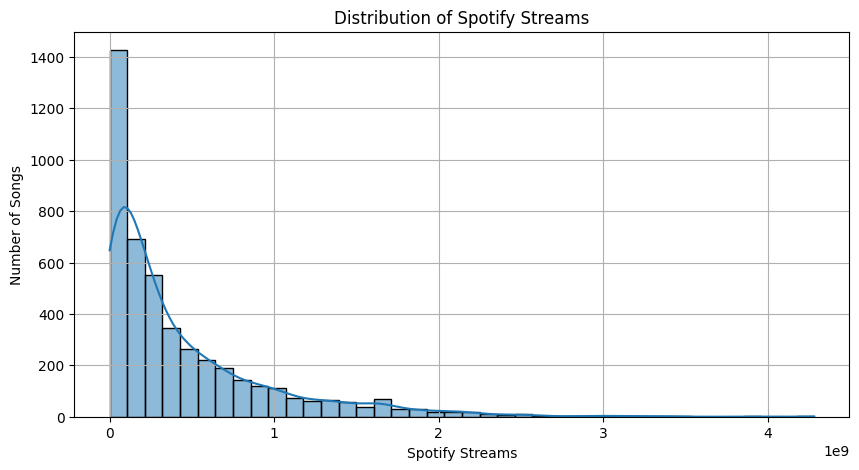

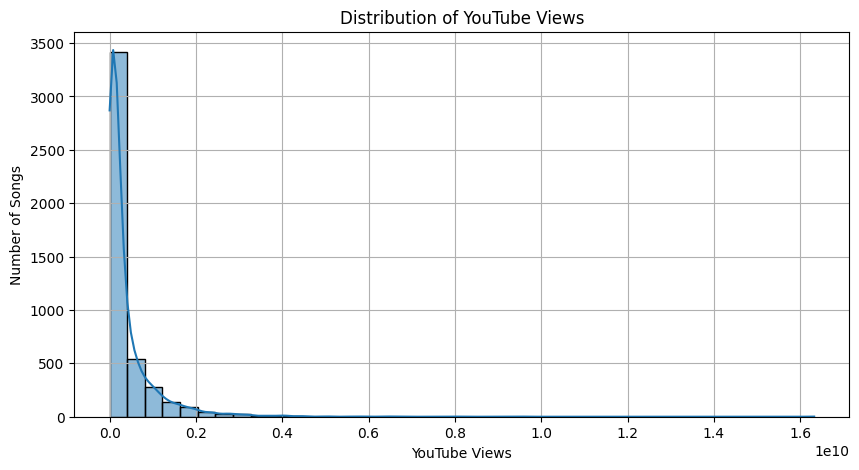

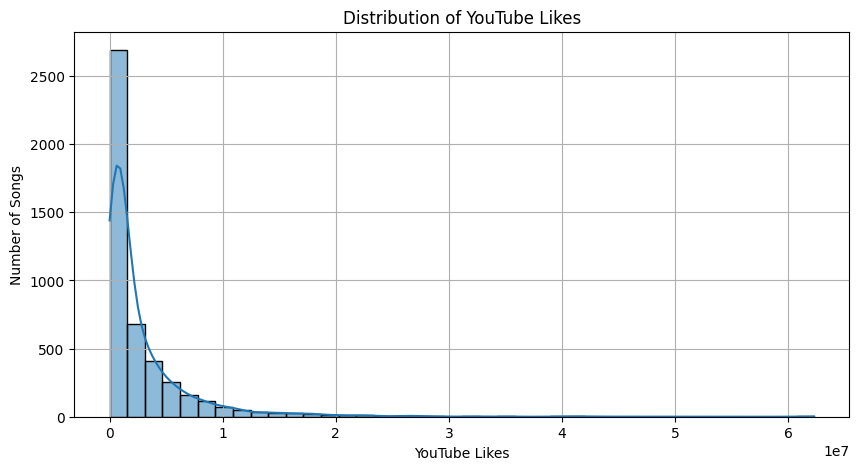

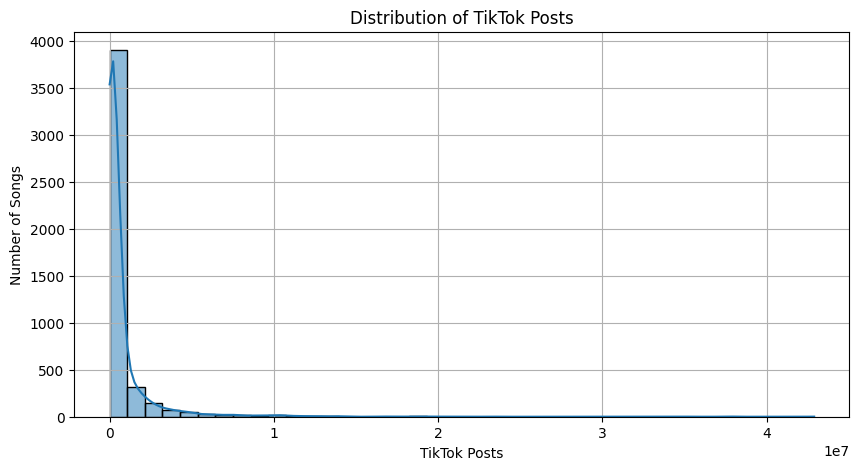

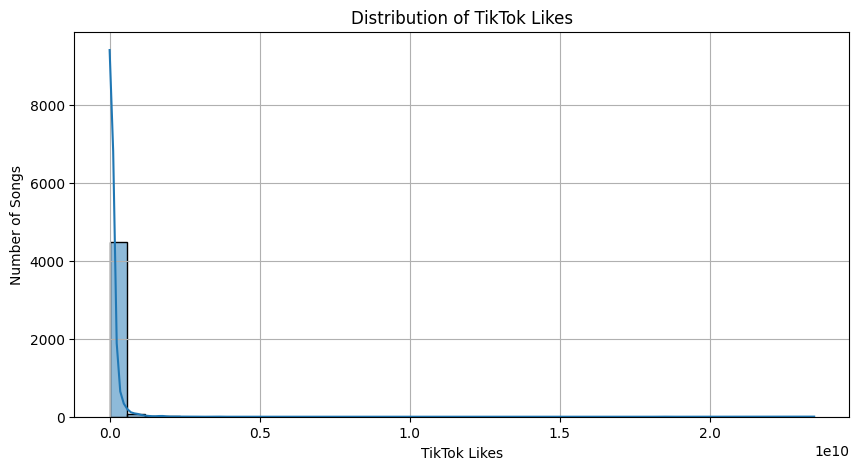

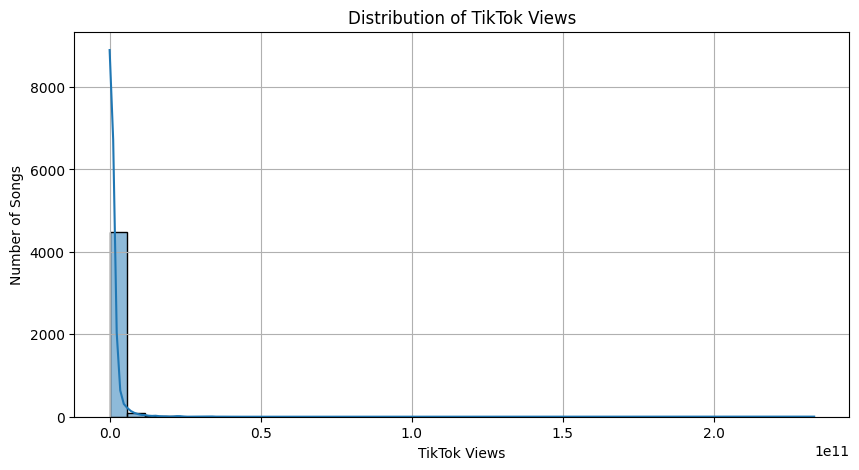

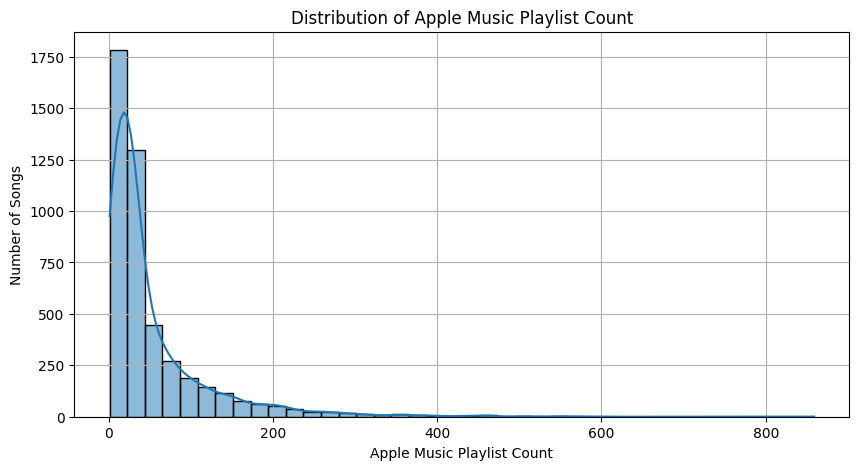

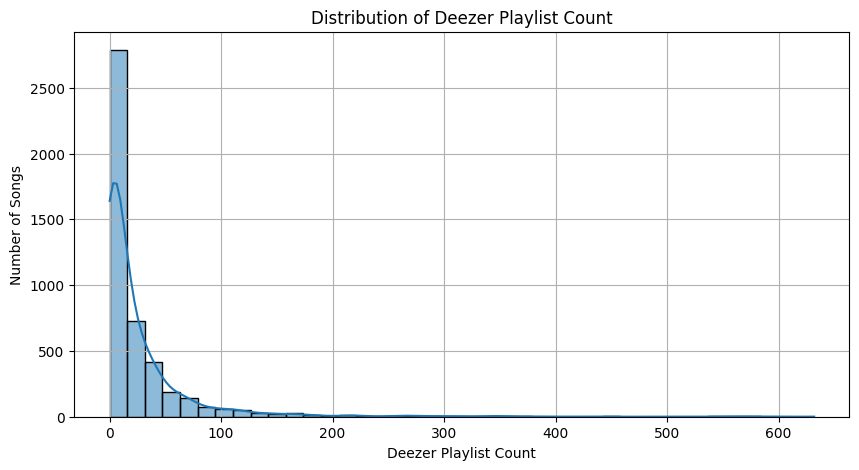

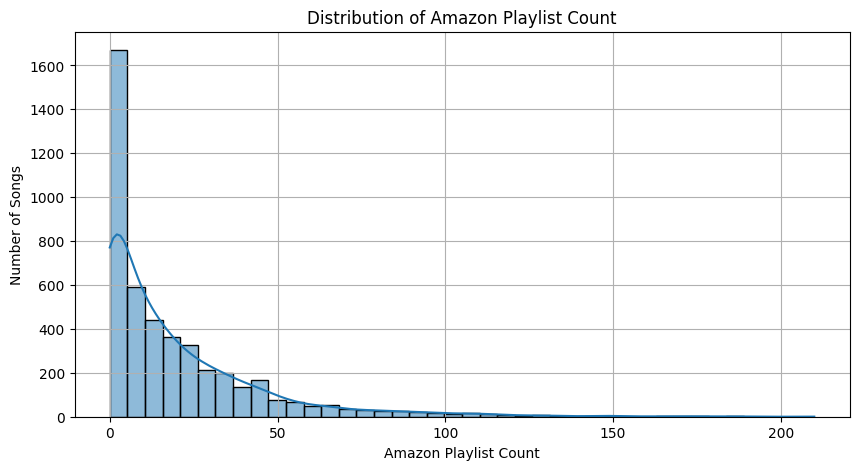

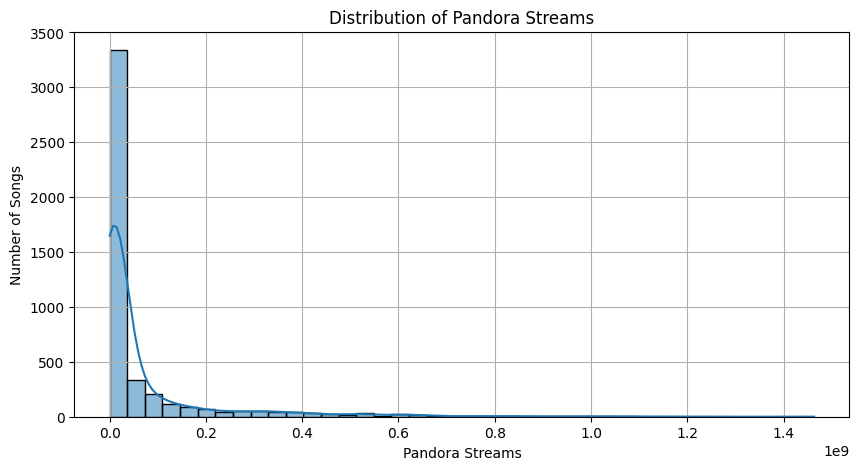

In [95]:
engagement_cols = [
    'Spotify Streams', 'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'TikTok Views',
    'Apple Music Playlist Count', 'Deezer Playlist Count',
    'Amazon Playlist Count', 'Pandora Streams'
]

for col in engagement_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Songs")
    plt.grid(True)
    plt.show()

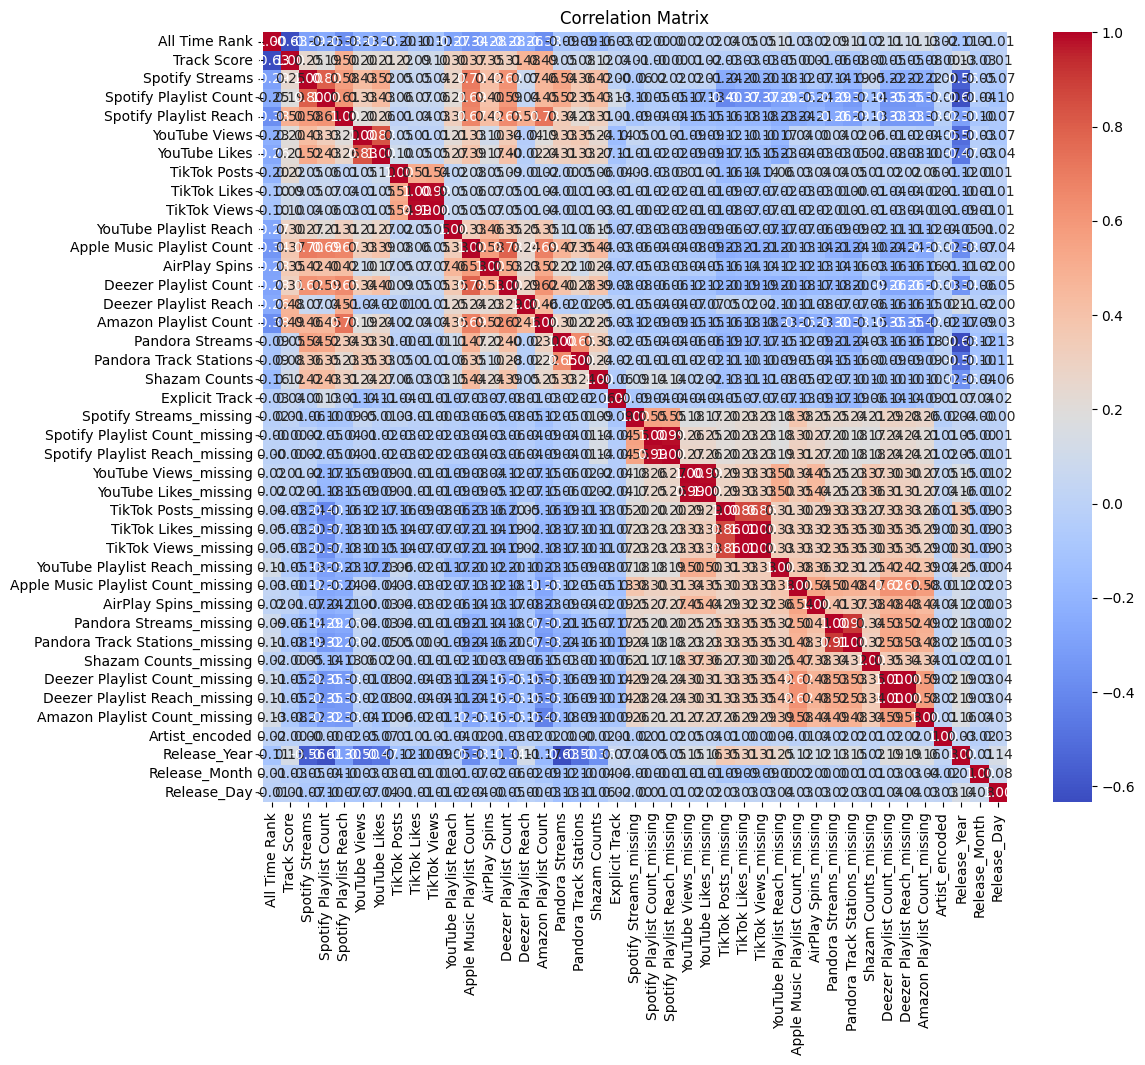

In [101]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

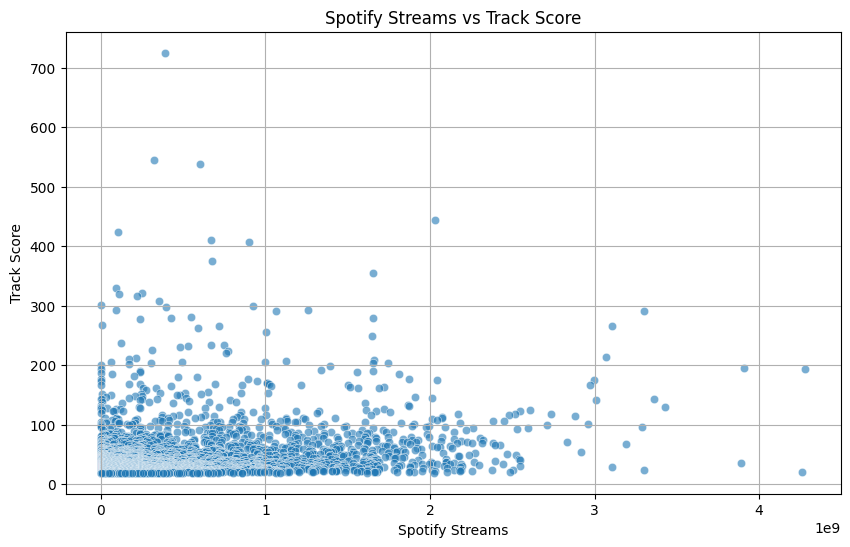

In [103]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Spotify Streams', y='Track Score', data=df, alpha=0.6)
plt.title("Spotify Streams vs Track Score")
plt.xlabel("Spotify Streams")
plt.ylabel("Track Score")
plt.grid(True)
plt.show()


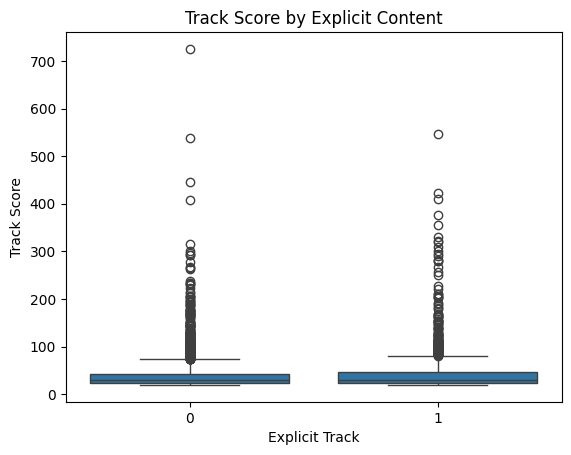

In [105]:
if "Explicit Track" in df.columns:
    sns.boxplot(x="Explicit Track", y="Track Score", data=df)
    plt.title("Track Score by Explicit Content")
    plt.show()

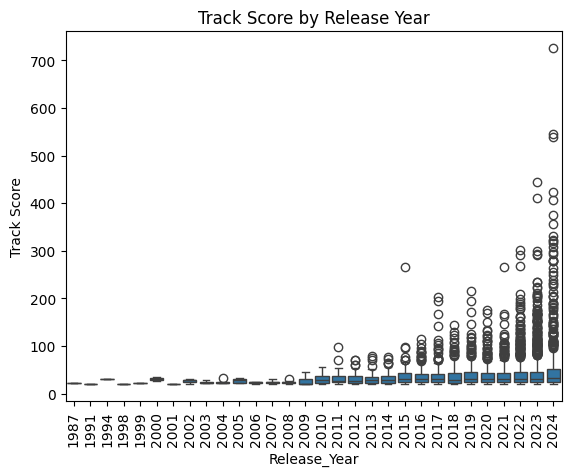

In [107]:
sns.boxplot(x="Release_Year", y="Track Score", data=df)
plt.xticks(rotation=90)
plt.title("Track Score by Release Year")
plt.show()

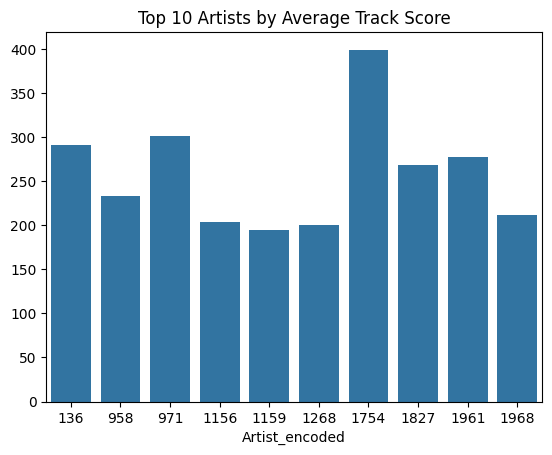

In [109]:
top_artists = df.groupby("Artist_encoded")["Track Score"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.title("Top 10 Artists by Average Track Score")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11232\95234763.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col: df.groupby(pd.cut(df[col], bins=10))["Track Score"].mean()


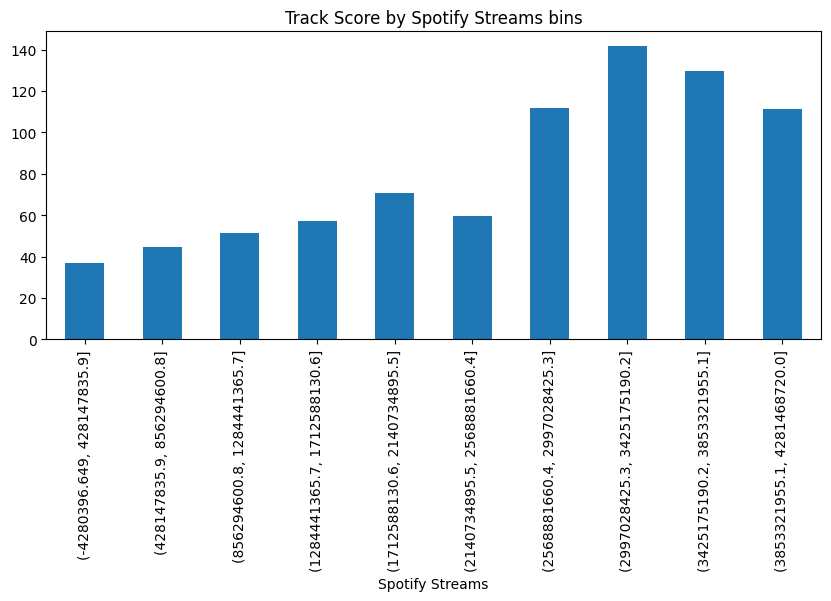

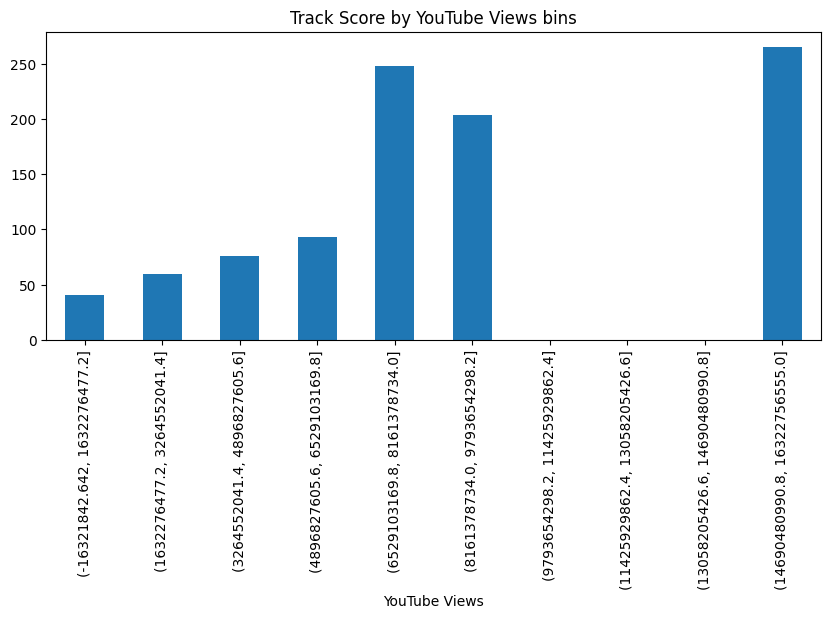

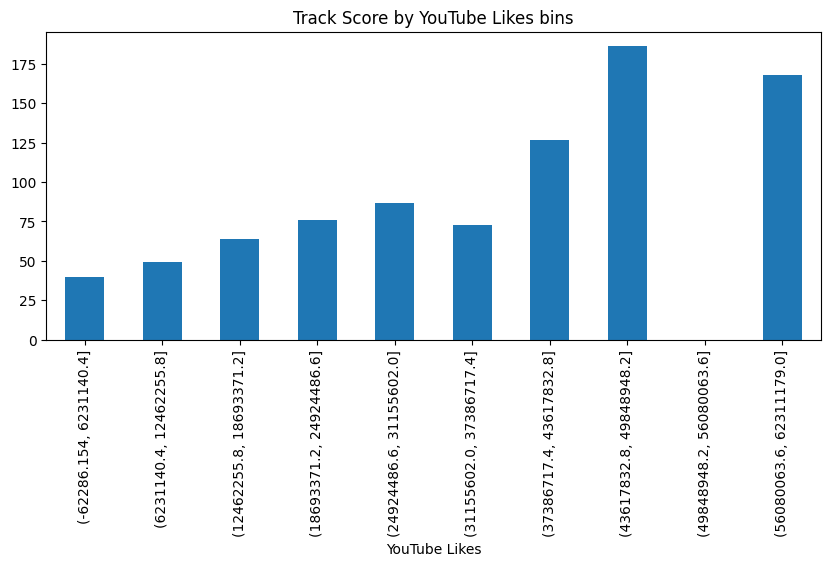

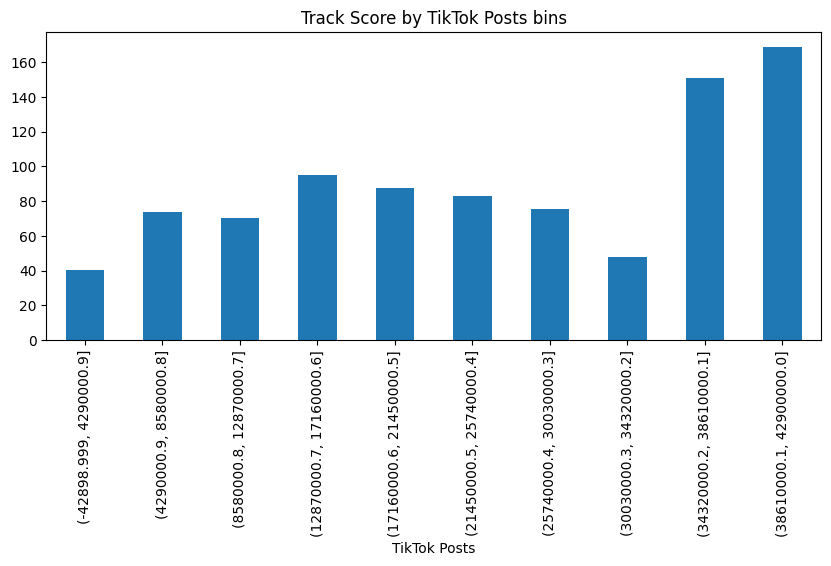

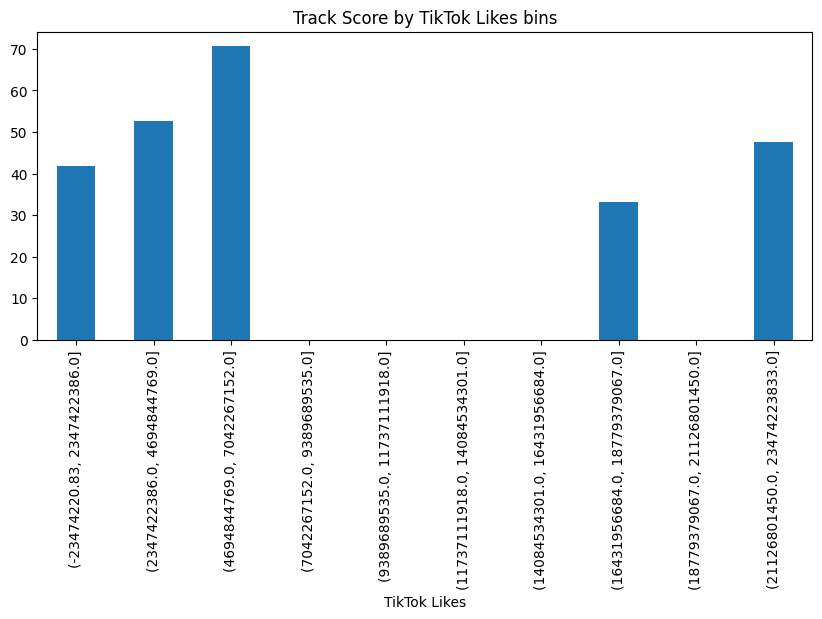

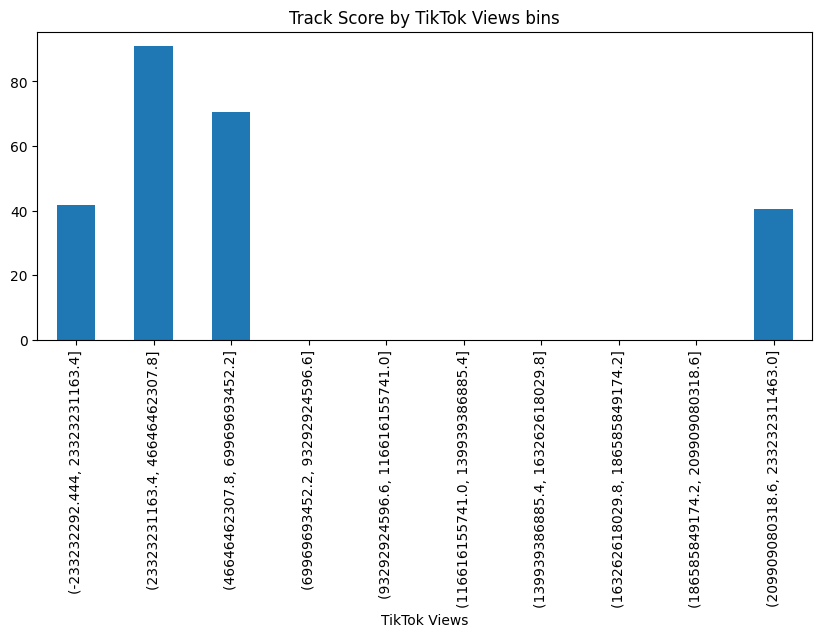

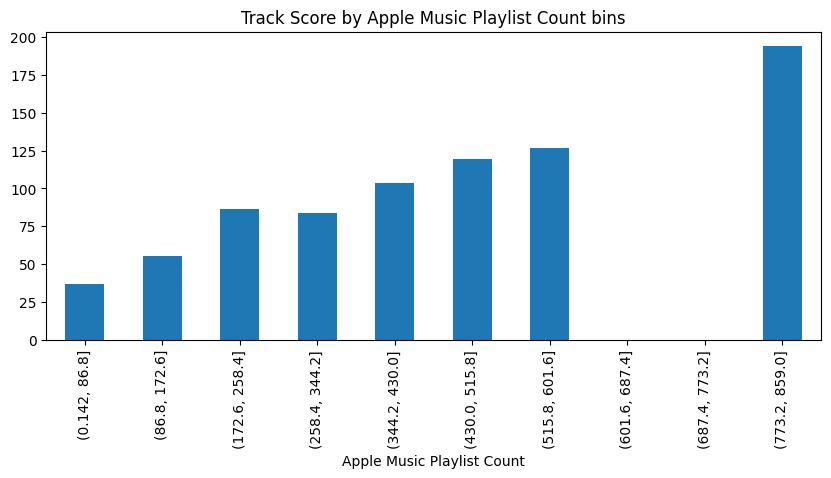

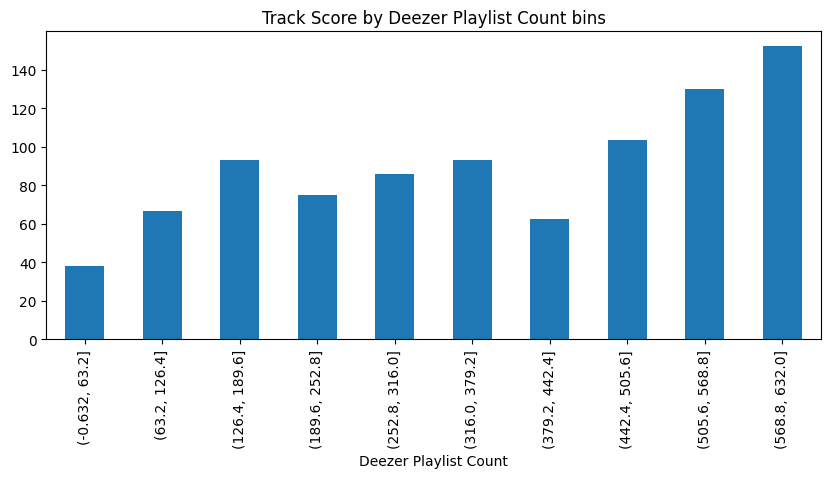

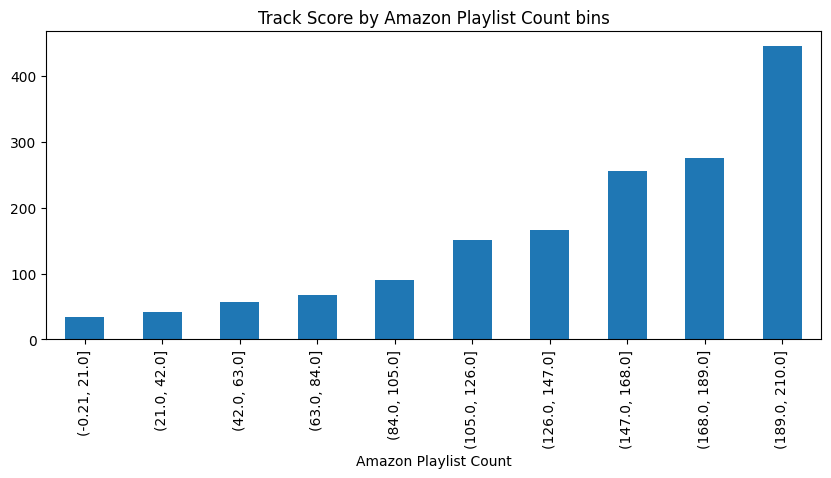

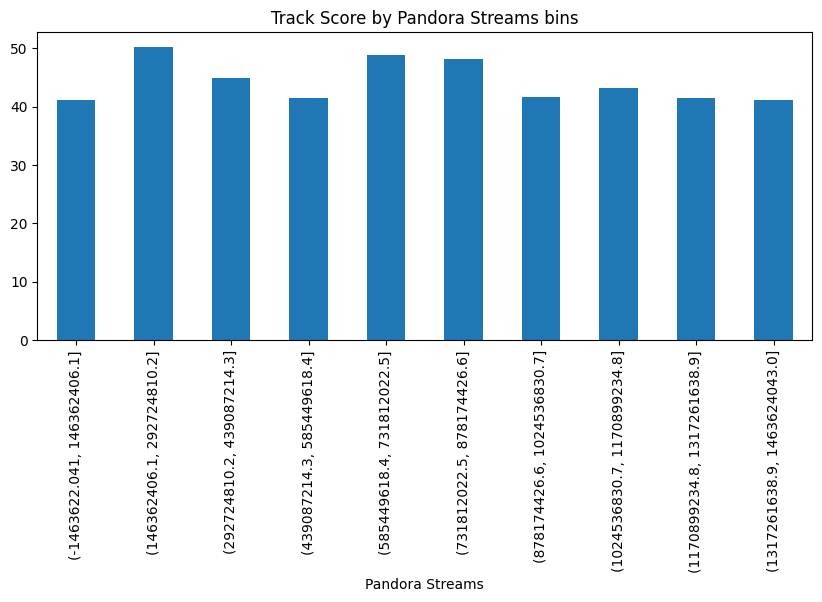

In [111]:
avg_scores = {
    col: df.groupby(pd.cut(df[col], bins=10))["Track Score"].mean()
    for col in engagement_cols
}

for col, series in avg_scores.items():
    series.plot(kind='bar', figsize=(10,4), title=f"Track Score by {col} bins")
    plt.show()


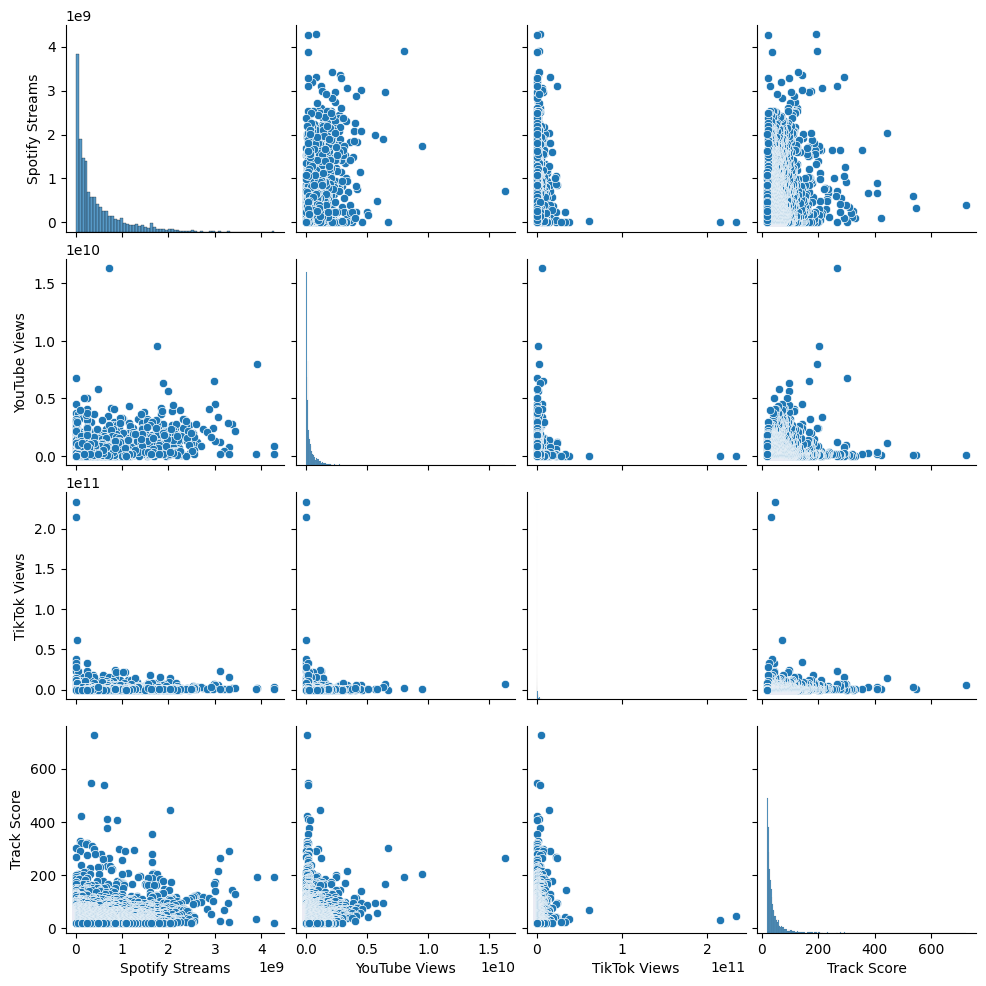

In [113]:
top_features = ['Spotify Streams','YouTube Views','TikTok Views','Track Score']
sns.pairplot(df[top_features])
plt.show()

In [119]:
#Drop All Time Rank because it leaks information about popularity.
X = model_train_df.drop(columns=["Track Score", "All Time Rank"], axis=1)
y = model_train_df["Track Score"]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Model Selection – What a Data Scientist Should Think Before Choosing a Model**
We should never run models blindly. First, we ask key questions to guide our approach:

**1)What are we trying to do?**
We want to predict the popularity of a song by its Track Score using platform-related metrics like Spotify Streams, Spotify Playlist Count, YouTube Views, TikTok Likes, Apple Music Playlist Count, and Shazam Counts, along with release date features (Release_Year, Release_Month, Release_Day) and encoded artist information. This is a regression problem because the target, Track Score, is a continuous number.

**2) What do we know about the data?**
- The dataset has around 4,600 rows a medium-sized dataset.
- All numeric features are cleaned, missing values handled, and categorical features (Artist) encoded.
- The relationships between features and popularity may be linear or more complex we do not know yet.

**3) What do we want from the model?**
- Interpretability: to understand which factors influence song popularity.
- Performance: to predict Track Score as accurately as possible.

**4)Our plan for modeling:**
- Linear Regression: A simple baseline that is interpretable and helps us understand feature impact.
- Random Forest: Captures non-linear patterns and provides feature importance.
- XGBoost: High-performance model for maximizing prediction accuracy.

In [125]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"Model: {model.__class__.__name__}")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"R²  : {r2:.2f}")
    print("-" * 30)

    return {
        "model": model.__class__.__name__,
        "MAE": mae,
        "MSE": mse,
        "R2": r2,
        "model_object": model,
        "predictions": predictions
    }

In [127]:
models_before_transform = [
    LinearRegression(),
    RandomForestRegressor(random_state=42)
]

results = []

for model in models_before_transform:
    result = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    results.append(result)

Model: LinearRegression
MAE : 13.65
MSE : 625.01
R²  : 0.56
------------------------------
Model: RandomForestRegressor
MAE : 10.39
MSE : 493.82
R²  : 0.65
------------------------------


In [130]:
def evaluate_model_cv(model, X, y, cv=5):
    scores = cross_validate(model, X, y, cv=cv,
                            scoring=('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'),
                            return_train_score=False)

    print(f"Model: {model.__class__.__name__}")
    print(f"Mean R² : {scores['test_r2'].mean():.2f}")
    print(f"Mean MAE: {-scores['test_neg_mean_absolute_error'].mean():.2f}")
    print(f"Mean MSE: {-scores['test_neg_mean_squared_error'].mean():.2f}")
    print("-" * 30)

In [132]:
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)


evaluate_model_cv(lin_reg, X, y)
evaluate_model_cv(rf_reg, X, y)

Model: LinearRegression
Mean R² : -115.45
Mean MAE: 17.88
Mean MSE: 1273.75
------------------------------
Model: RandomForestRegressor
Mean R² : -61.39
Mean MAE: 17.66
Mean MSE: 1470.87
------------------------------


In [138]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [140]:
xgb_results = train_and_evaluate(xgb_model, X_train, y_train, X_test, y_test)

Model: XGBRegressor
MAE : 8.18
MSE : 265.49
R²  : 0.81
------------------------------


In [142]:
evaluate_model_cv(xgb_model, X_train, y_train)

Model: XGBRegressor
Mean R² : 0.72
Mean MAE: 8.95
Mean MSE: 415.05
------------------------------


In [146]:
#log transformation
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

y_train_log.head()

2793    3.317816
3606    3.165475
643     4.109233
1270    3.763523
2155    3.465736
Name: Track Score, dtype: float64

In [148]:
models_after_transform = [
    LinearRegression(),
    RandomForestRegressor(random_state=42),
    XGBRegressor(random_state=42, verbosity=0)
]

log_model_results = []
for model in models_after_transform:
    result = train_and_evaluate(model, X_train, y_train_log, X_test, y_test_log)
    log_model_results.append(result)

Model: LinearRegression
MAE : 0.24
MSE : 0.11
R²  : 0.60
------------------------------
Model: RandomForestRegressor
MAE : 0.20
MSE : 0.07
R²  : 0.76
------------------------------
Model: XGBRegressor
MAE : 0.16
MSE : 0.05
R²  : 0.84
------------------------------


In [150]:
for model in models_after_transform:
    evaluate_model_cv(model, X_train, y_train_log)

Model: LinearRegression
Mean R² : 0.57
Mean MAE: 0.24
Mean MSE: 0.11
------------------------------
Model: RandomForestRegressor
Mean R² : 0.69
Mean MAE: 0.21
Mean MSE: 0.08
------------------------------
Model: XGBRegressor
Mean R² : 0.79
Mean MAE: 0.17
Mean MSE: 0.05
------------------------------


After testing different models, we found that log-transforming the target improved performance for all models by handling the skew in song popularity. Linear Regression performed reasonably well with an R² of 0.60, giving us interpretability and a baseline. Random Forest did better with an R² of 0.76, capturing non-linear patterns in the features. XGBoost achieved the best results with an R² of 0.84, showing it can model complex relationships and provide the most accurate predictions for song popularity. Overall, the log-transform helped reduce large errors, and XGBoost is our strongest model for this task.

**Feature Importance Analysis**

Now that we have trained and evaluated our models, it’s important to understand:
- Which platform-related features (like Spotify, YouTube, TikTok metrics) are influencing the predictions the most?
- What can we tell the Marketing and A&R teams about what drives a song’s popularity?
This helps turn a “black-box” model into something interpretable and actionable.

**What we are tackling:**
- Identify the top features using RandomForestRegressor and XGBRegressor.
- Visualize the feature importances with bar plots.
- Interpret the results in simple terms to explain which metrics matter most.
- Suggest practical applications, like playlist selection, targeted promotion, or predicting which songs are likely to go viral.

In [165]:
def plot_linear_regression_coefficients(model, X, top_n=15):
    coef = model.coef_
    feature_names = X.columns

    # Take absolute values to get magnitude of impact
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coef
    })

    # Sort by absolute value of coefficients
    coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
    coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
    plt.title(f"Top {top_n} Linear Regression Coefficients")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11232\182566893.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


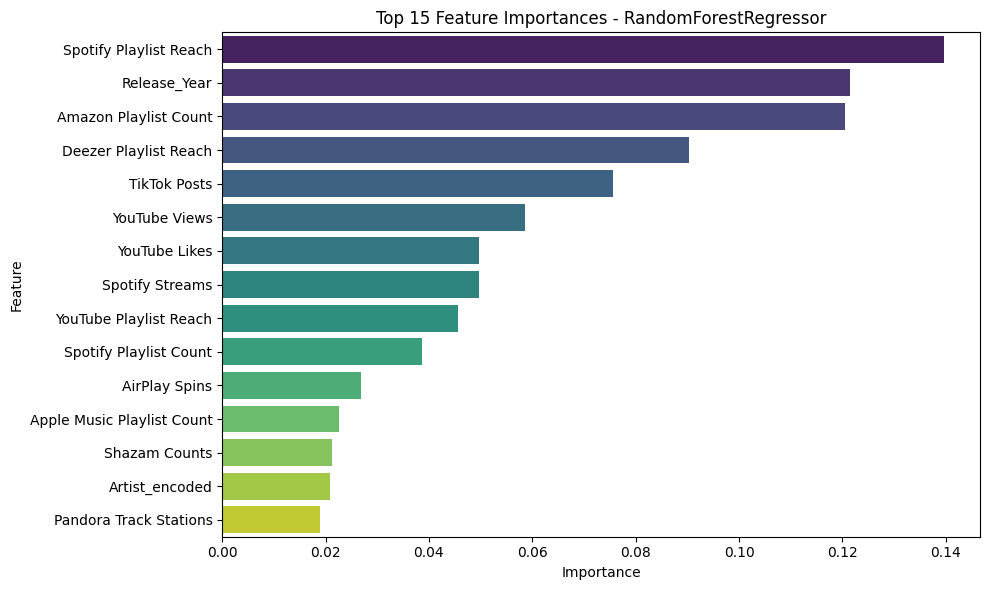

In [159]:
# Example usage for Random Forest
plot_feature_importance(models_after_transform[1], X_train, top_n=15)

In our graph the most influential feature is:

- Spotify Playlist Reach → The wider a song is featured on Spotify playlists, the more likely it is to gain streams.
- Release Year → Newer or trending releases tend to perform better.
- Amazon Playlist Count → Songs added to Amazon playlists are also likely to get more streams.
- Deezer Playlist Reach, TikTok Posts, YouTube Views → These platform metrics also have notable influence, showing that exposure across multiple platforms drives popularity.
- Spotify Streams, YouTube Playlist Reach, Spotify Playlist Count → Even the raw platform engagement metrics play a key role.

**Takeaway:** Platform reach and exposure matter the most, while release timing also plays an important role. Marketing and A&R teams can use this to focus promotion on high-reach playlists and cross-platform campaigns.

C:\Users\hp\AppData\Local\Temp\ipykernel_11232\182566893.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


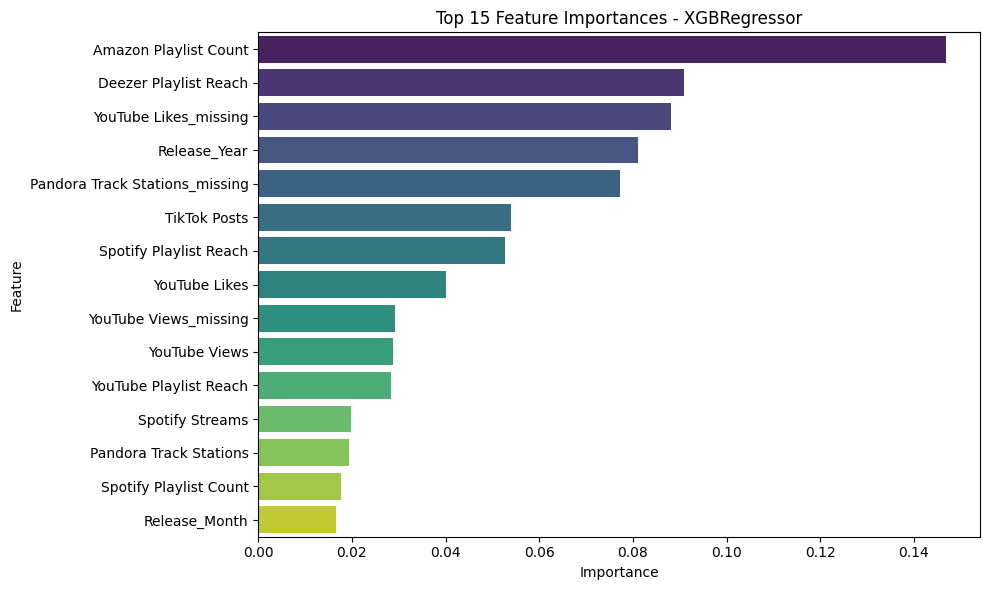

In [161]:
# Example usage for XGBoost
plot_feature_importance(models_after_transform[2], X_train, top_n=15)

Understanding our graph
- Playlist Placement & Reach: Amazon Playlist Count and Deezer Playlist Reach are the strongest predictors, showing that wider playlist exposure drives streams.
- Platform Engagement & Missing Data: YouTube Likes Missing and Pandora Track Missing indicate that even missing engagement data carries useful information for predicting popularity.
- Release Timing & Multi-Platform Promotion: Release Year, TikTok Posts, and Spotify Playlist Reach highlight the importance of recency and cross-platform promotion in boosting song popularity.

**Takeaway:** playlist placements (Amazon, Deezer), platform engagement metrics, and release timing are key predictors. The model also learns from missing data patterns, showing that absence of engagement on certain platforms can itself be informative. Marketing and A&R teams can prioritize playlist strategy and cross-platform exposure to maximize song streams.

**FINALLY**

We have successfully cleaned our dataset, performed exploratory data analysis, and built multiple models to predict song popularity based on platform metrics and release features.
The next step is to refactor our code into a modular structure, just like a data scientist or ML engineer would do in real-world projects. This means:
- Separating training, evaluation, and utility functions into clean, reusable files.
- Making the code more readable, reusable, and easier to debug or upgrade.
- Ensuring that the project can be collaborated on by multiple team members without breaking functionality.


Finally, we’ll **deploy our best model using Streamlit**, creating a user-friendly interface where users can input song features and see predicted streams. We’ll also display key insights from our EDA and model training to help teams like Marketing and A&R make data-driven decisions.
This step is about turning our notebook into a real, usable product — not just a static analysis.